In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

In [2]:
data=pd.read_csv("customer_churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"],errors="coerce")
data.dropna(subset=["TotalCharges"], inplace=True)

In [7]:
data.TotalCharges.dtypes

dtype('float64')

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
len(data)*0.10

703.2

In [10]:
data.isnull().sum().sum()

0

In [11]:
for i in data.select_dtypes(include=["int64","float64"]).columns:
    if (data[i].skew()>0.5):
        print(i,"skewed")
        data[i]=data[i].fillna(data[i].median())
    else:
        print(i,"Normal")
        data[i]=data[i].fillna(data[i].mean())

SeniorCitizen skewed
tenure Normal
MonthlyCharges Normal
TotalCharges skewed


SeniorCitizen


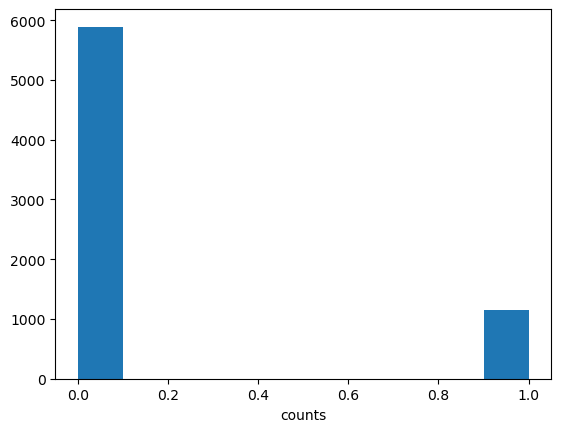

tenure


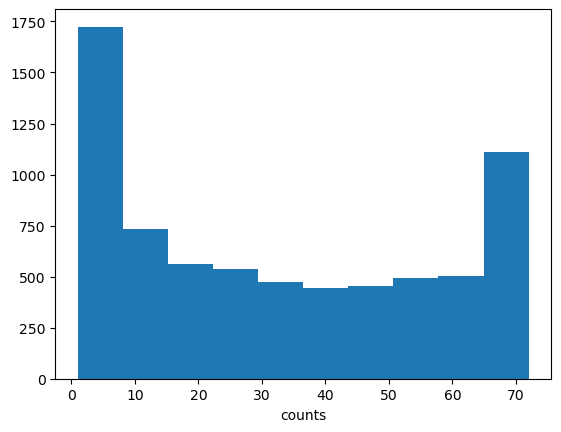

MonthlyCharges


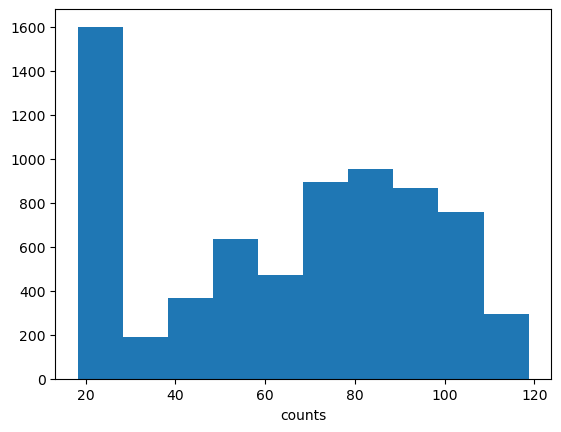

TotalCharges


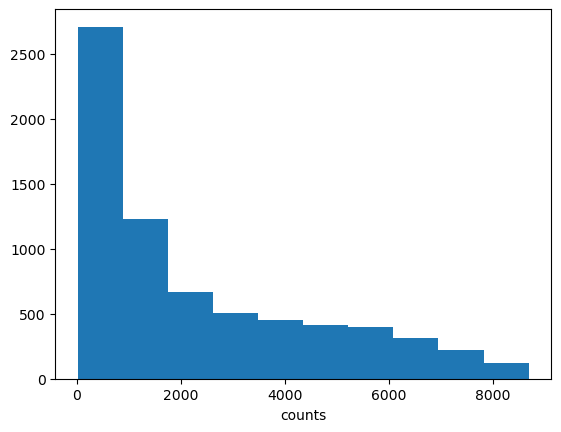

In [12]:
for i in data.select_dtypes(include=["int64","float64"]).columns:
    plt.hist(data[i])
    print(i)
    plt.xlabel("counts")
    plt.show()

<Axes: ylabel='Density'>

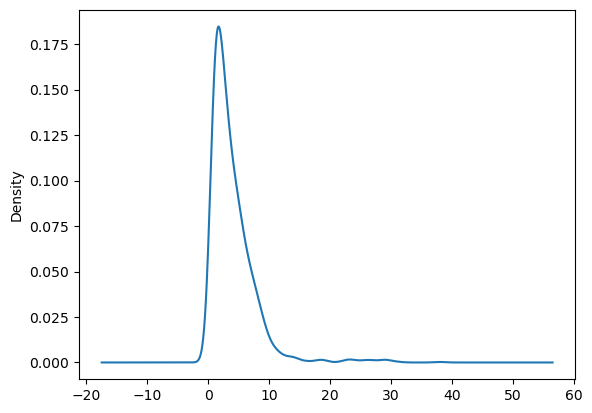

In [13]:
data.groupby(["MonthlyCharges"])["tenure"].nunique().plot(kind="density")

<Axes: xlabel='MonthlyCharges'>

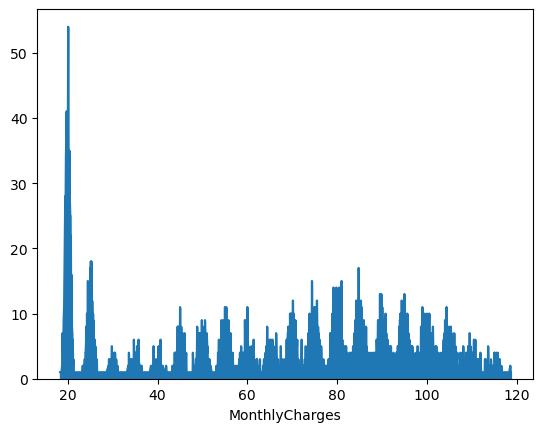

In [14]:
data.groupby(["MonthlyCharges"])["TotalCharges"].nunique().plot(kind="area")

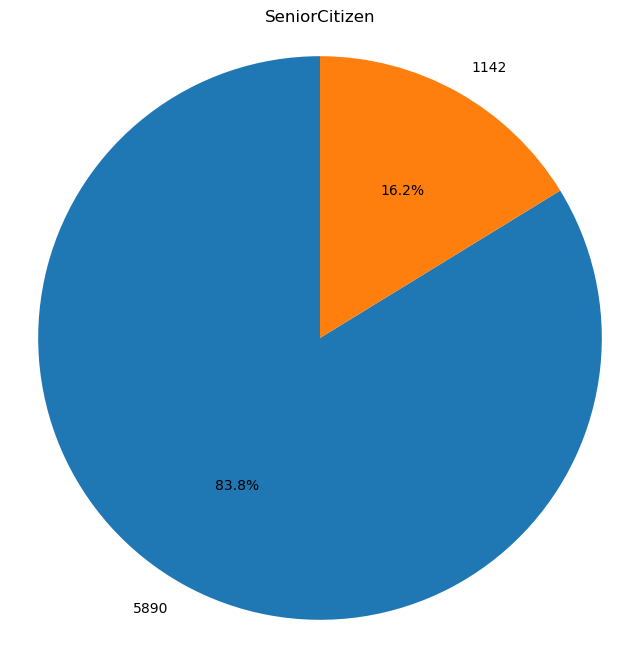

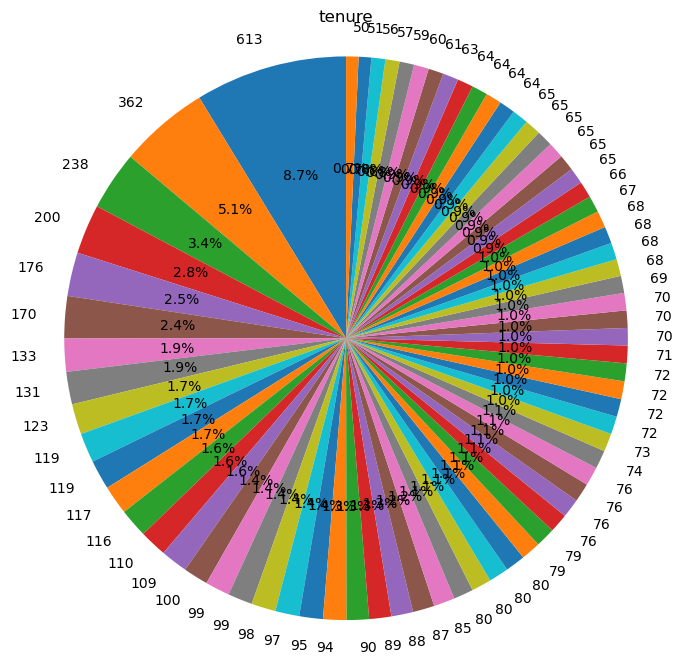

In [15]:
for i in data.select_dtypes(include=["int64"]).columns:
    plt.figure(figsize=(8,8))
    cnt=data[i].value_counts()
    plt.title(i)
    plt.pie(cnt,labels=cnt,autopct="%1.1f%%",startangle=90)
    plt.axis("equal")
    plt.show()

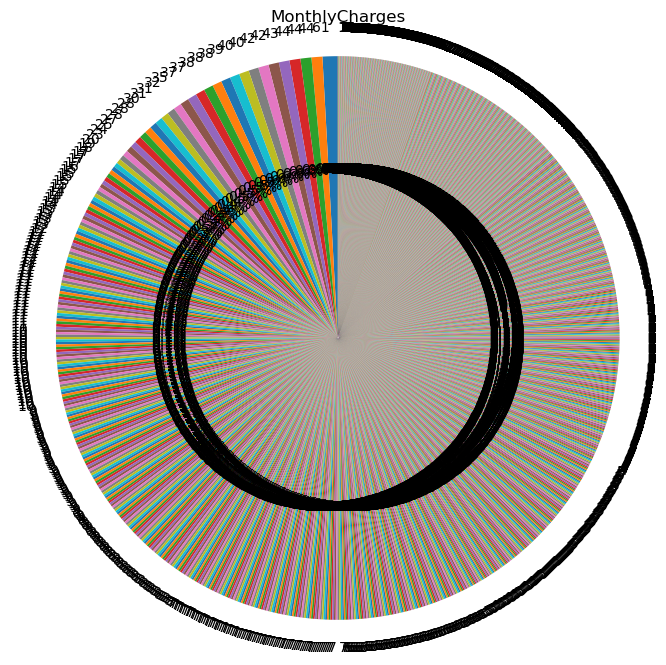

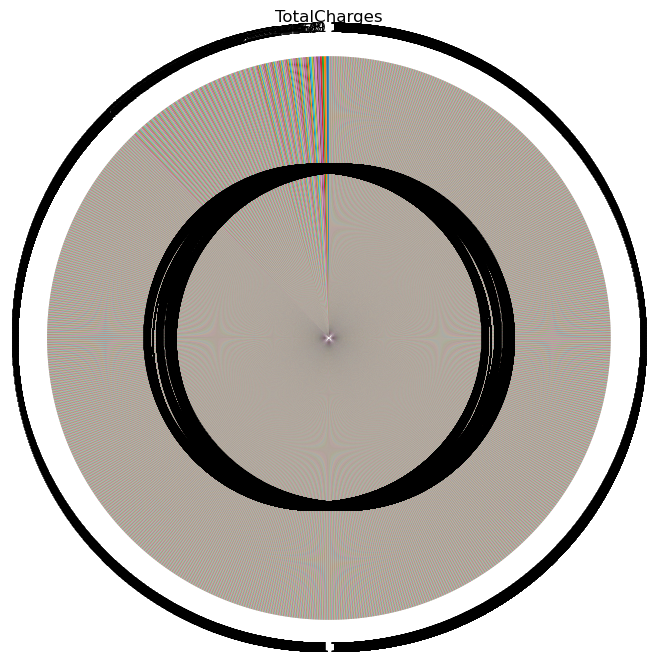

In [16]:
for i in data.select_dtypes(include=["float64"]).columns:
    plt.figure(figsize=(8,8))
    cnt=data[i].value_counts()
    plt.title(i)
    plt.pie(cnt,labels=cnt,autopct="%1.1f%%",startangle=90)
    plt.axis("equal")
    plt.show()

SeniorCitizen


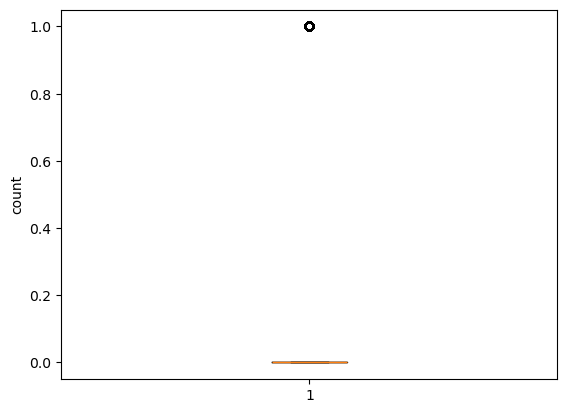

tenure


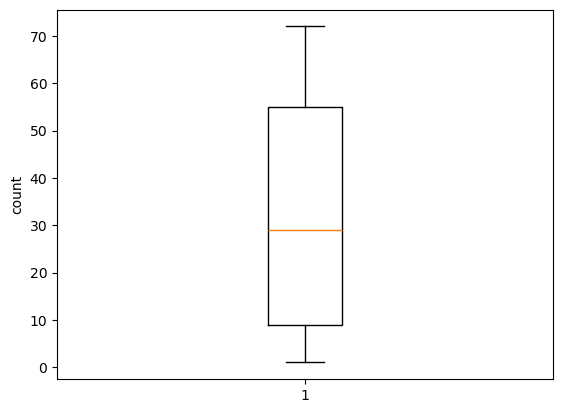

MonthlyCharges


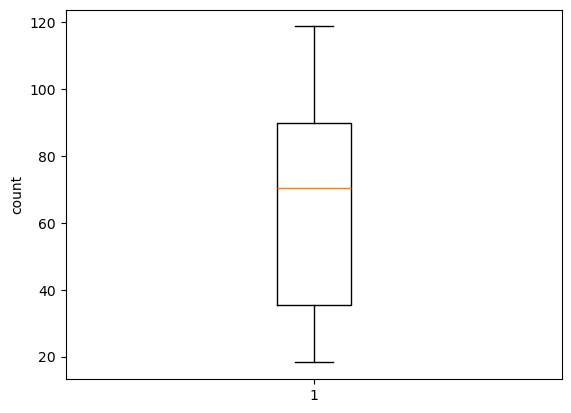

TotalCharges


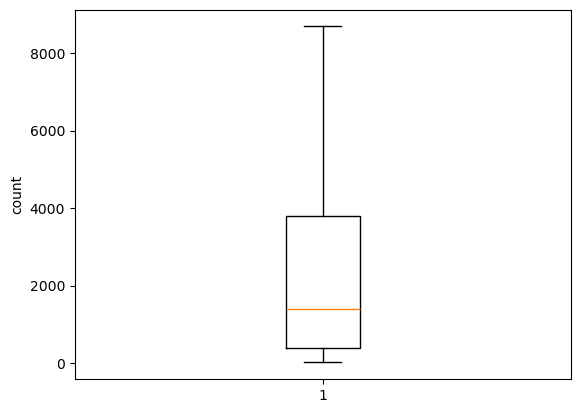

In [17]:
for i in data.select_dtypes(include=["int64","float64"]).columns:
    plt.boxplot(data[i])
    print(i)
    plt.ylabel("count")
    plt.show()

<Axes: >

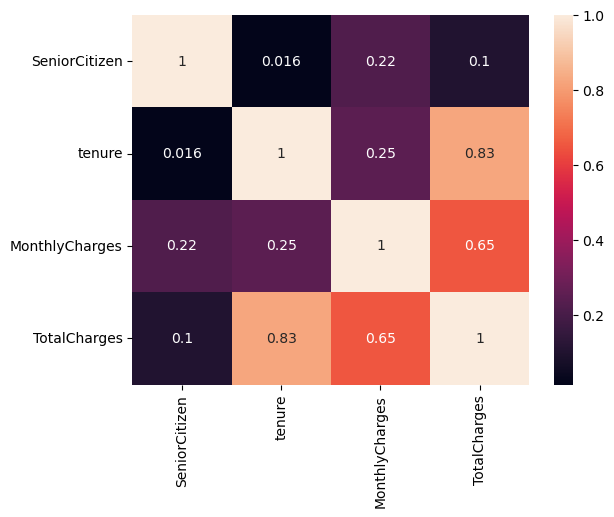

In [18]:
import seaborn as sns
data=data.select_dtypes(include=["int64","float64"])
sns.heatmap(data.corr(),annot=True)

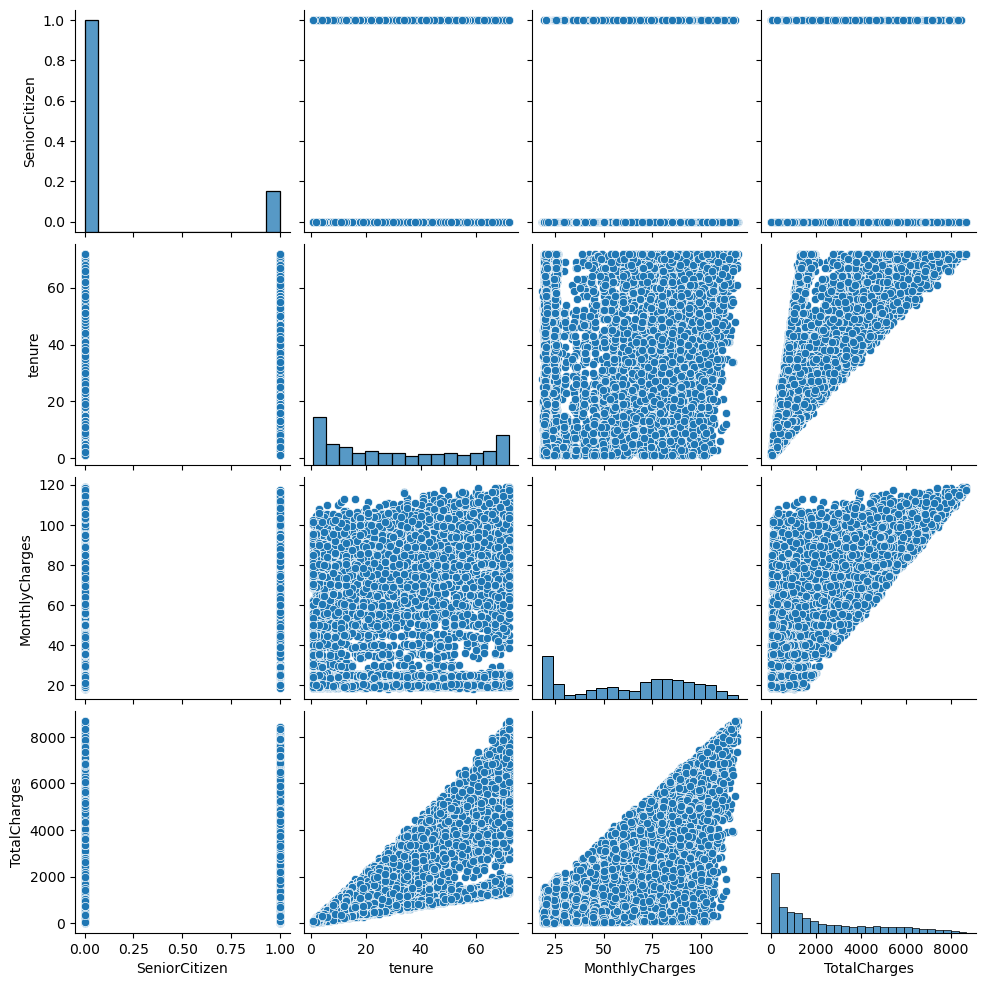

In [19]:
sns.pairplot(data)

In [20]:
outlier_list = ["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]
for i in outlier_list:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[i] >= Q1 - 1.5 * IQR) & (data[i] <= Q3 + 1.5 * IQR)]


In [21]:
# Check for missing values
print(data.isnull().sum())

# Check for infinite values
print(np.isinf(data).sum())


SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64
SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64


In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in data.columns:
    if((data[i].dtypes!="object")&(i!="charges")):
        var_inflation.append(i)
x=data[var_inflation]
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,SeniorCitizen,NaN
1,tenure,5.791341
2,MonthlyCharges,3.325142
3,TotalCharges,7.551373


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [80]:
x=data.drop(columns=["MonthlyCharges"])
y=data["MonthlyCharges"]


In [82]:
x.head()

,SeniorCitizen,tenure,TotalCharges
0,0,1,29.85
1,0,34,1889.50
2,0,2,108.15
3,0,45,1840.75
4,0,2,151.65


In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4403, 3), (1468, 3), (4403,), (1468,))

In [86]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [88]:
pred=model1.predict(x_test)

In [90]:
pred

array([64.32676669, 58.05149479, 97.78083359, ..., 90.99981323,
       52.67091652, 60.05654254])

In [92]:
from sklearn.metrics import*
r2score=r2_score(y_test,pred)
r2score

0.6807455005995354

In [94]:
x_test

,SeniorCitizen,tenure,TotalCharges
6599,0,13,1215.60
4073,0,14,937.60
5230,0,58,5563.65
1162,0,67,4991.50
4676,0,19,377.55
...,...,...,...
653,0,17,475.25
2293,0,72,6151.90
3456,0,67,5714.20
4653,0,30,1561.50


In [96]:
import warnings
warnings.simplefilter("ignore")

In [98]:
model1.predict([[0,17,475.25]])

array([46.18866829])

In [100]:
#Average value is used to calculate the Mean Squared Error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 290.03229628477993


In [102]:
model1.score(x_train,y_train)

0.6932878299789698

In [104]:
model1.score(x_test,y_test)

0.6807455005995354

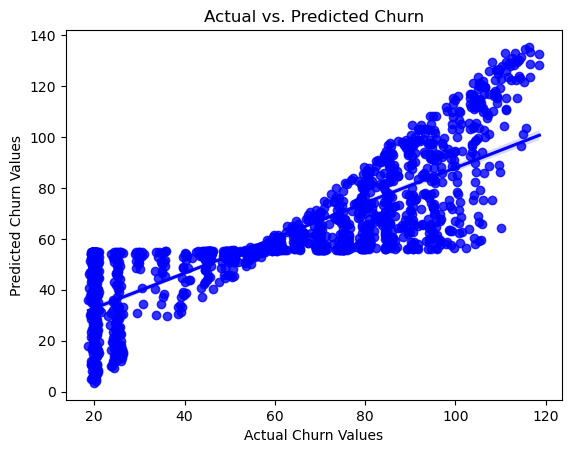

In [106]:
sns.regplot(x=y_test, y=pred, color='Blue')
plt.xlabel("Actual Churn Values")
plt.ylabel("Predicted Churn Values")
plt.title("Actual vs. Predicted Churn")
plt.show()
